170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


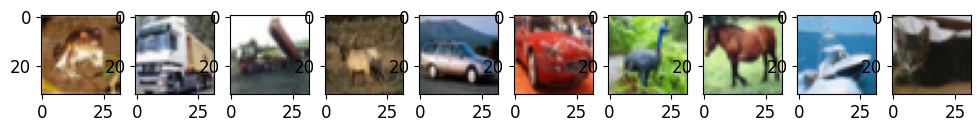

(50000, 32, 32, 3)

In [ ]:
# Importing all requisite libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import regularizers
from keras import Sequential
import matplotlib

# Specify plot label tick size
matplotlib.rc("xtick", labelsize=12)
matplotlib.rc("ytick", labelsize=12)

# Loading the CIFAR10 training and test data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Plotting first 10 images in dataset
fig, axes = plt.subplots(1,10,figsize=(12,6))
for img,ax in zip(x_train[:10], axes):
  ax.imshow(img)
plt.show()

# Converting the training and test data to float32
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# Normalizing the training and test data from 0-1.0
x_train/=255.0
x_test/=255.0
x_train.shape

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Define CNN with CONV-CONV-POOL-DROPOUT-CONV-POOL-DROPOUT-CONV-CONV-CONV-POOL-DROPOUT-FC-FC- DROPOUT-FC architecture
model_3=Sequential([
keras.layers.Conv2D(96, kernel_size=(3,3),activation='relu', strides=1),
keras.layers.Conv2D(96, kernel_size=(3,3),activation='relu', strides=1),
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'),
keras.layers.Dropout(0.5, noise_shape=None, seed=None),
keras.layers.Conv2D(128, kernel_size=(3,3),activation='relu', strides=1),
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'),
keras.layers.Dropout(0.5, noise_shape=None, seed=None),
keras.layers.Conv2D(128, kernel_size=(2,2),activation='relu', strides=1),
keras.layers.Conv2D(128, kernel_size=(2,2),activation='relu', strides=1),
keras.layers.Conv2D(128, kernel_size=(2,2),activation='relu', strides=1),
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2,padding='same'),
keras.layers.Dropout(0.5, noise_shape=None, seed=None),
keras.layers.Flatten(),
keras.layers.Dense(1024, activation='relu'),
keras.layers.Dropout(0.5, noise_shape=None, seed=None),
keras.layers.Dense(512, activation='relu'),
keras.layers.Dropout(0.5, noise_shape=None, seed=None),
keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Configure optimizer, objective function and metrics to be evaluated
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Train model using 20,40, 60, 100, 200 epochs, batch size of 128 and 20% validation data
history=model_3.fit(x_train, y_train, batch_size=128,epochs=200,validation_split=0.2)

Epoch 1/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 46ms/step - accuracy: 0.1809 - loss: 2.1247 - val_accuracy: 0.4150 - val_loss: 1.6050
Epoch 2/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 23ms/step - accuracy: 0.4109 - loss: 1.5889 - val_accuracy: 0.5000 - val_loss: 1.3675
Epoch 3/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.4785 - loss: 1.4207 - val_accuracy: 0.5678 - val_loss: 1.1897
Epoch 4/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5307 - loss: 1.2905 - val_accuracy: 0.5841 - val_loss: 1.1577
Epoch 5/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5691 - loss: 1.2176 - val_accuracy: 0.6115 - val_loss: 1.0801
Epoch 6/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5832 - loss: 1.1629 - val_accuracy: 0.6364 - val_loss: 1.0135
Epoch 7/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5999 - loss: 1.1239 - val_accuracy: 0.6181 - val_loss: 1.0628
Epoch 8/200
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.6174 - loss: 1.0

In [ ]:
model_3.save('model_3.keras')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │         110,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 5, 5, 128)           │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 128)           │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 128)           │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,346,048 (16.58 MB)

 Trainable params: 1,448,682 (5.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,897,366 (11.05 MB)

313/313 - 2s - 5ms/step - accuracy: 0.7763 - loss: 0.6678

 Test accuracy: 0.7763000130653381


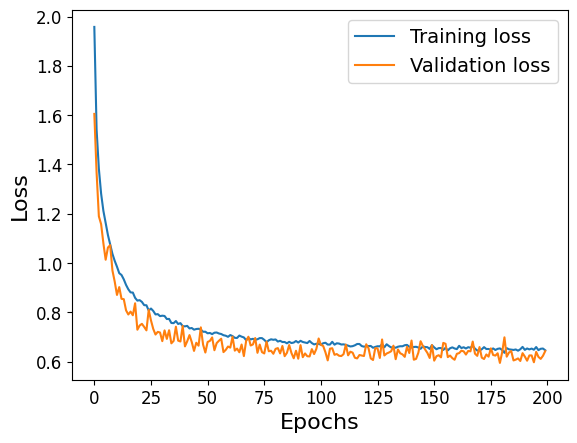

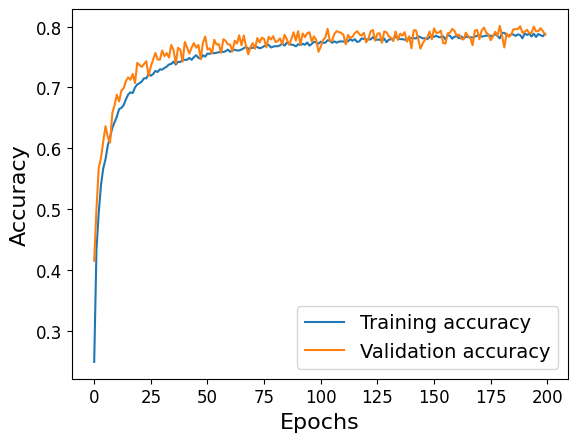

In [ ]:
# Display various layers of CNN
model_3.summary()

# Evaluate model against test data
test_loss, test_acc = model_3.evaluate(x_test, y_test, verbose=2)
print(f'\n Test accuracy: {test_acc}')

# Compare training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.legend(['Training loss', 'Validation loss'], fontsize=14)
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=14)
plt.show()

In [ ]:
test_loss, test_accuracy = model_3.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.6677967309951782
Test Accuracy: 0.7763000130653381


In [ ]:
# Dự đoán
predictions = model_3.predict(x_test)

# Lấy nhãn dự đoán (chọn lớp có xác suất cao nhất)
predicted_classes = predictions.argmax(axis=-1)

# Kiểm tra vài kết quả
import numpy as np
for i in range(10):
    print(f"Actual: {y_test[i]}, Predicted: {predicted_classes[i]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Actual: [3], Predicted: 3
Actual: [8], Predicted: 8
Actual: [8], Predicted: 8
Actual: [0], Predicted: 0
Actual: [6], Predicted: 6
Actual: [6], Predicted: 6
Actual: [1], Predicted: 1
Actual: [6], Predicted: 6
Actual: [3], Predicted: 3
Actual: [1], Predicted: 1


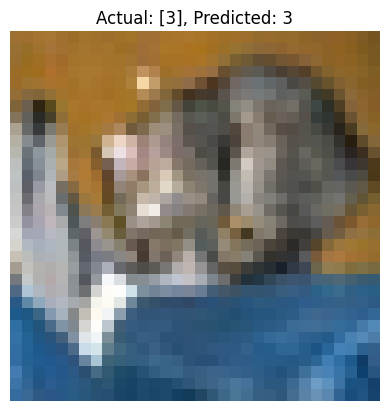

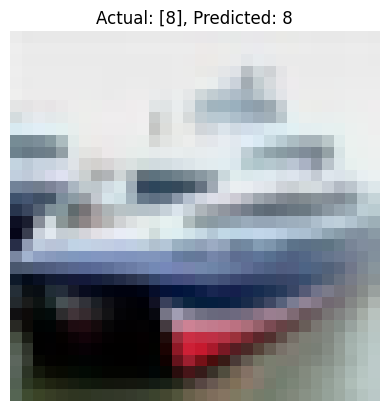

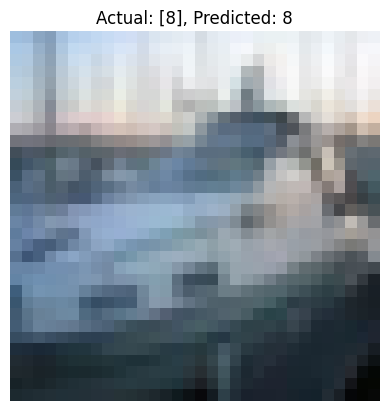

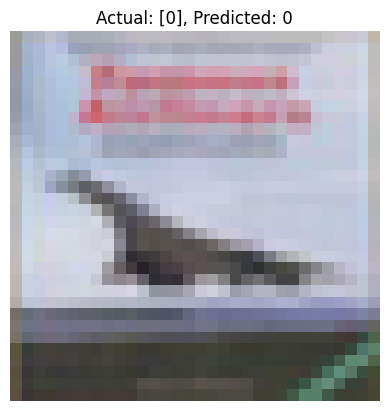

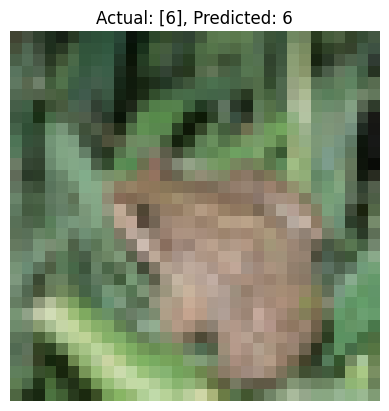

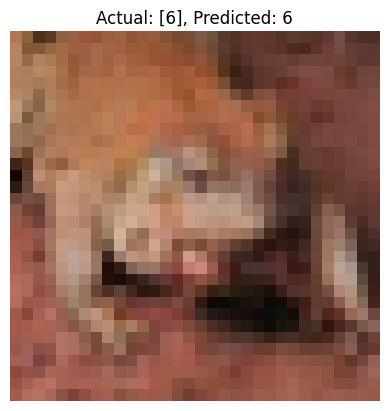

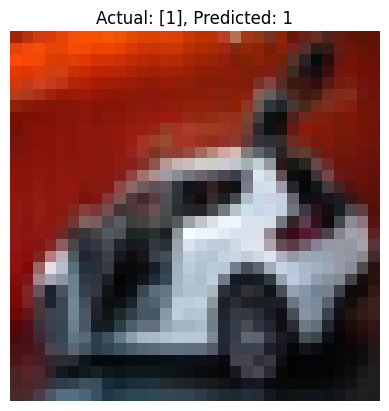

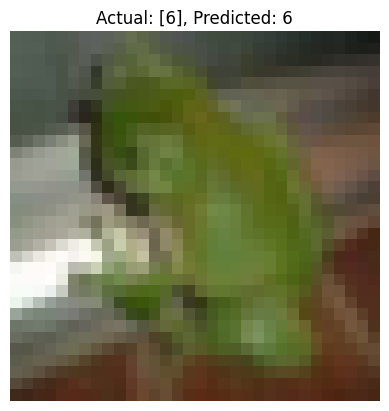

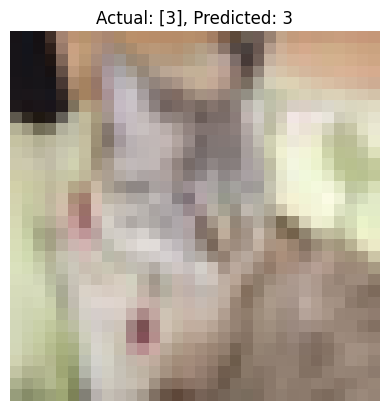

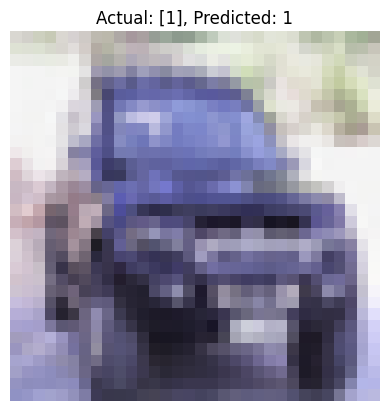

In [ ]:
import matplotlib.pyplot as plt

# Hiển thị 10 hình ảnh với nhãn thực tế và dự đoán
for i in range(10):
    plt.imshow(x_test[i])
    plt.title(f"Actual: {y_test[i]}, Predicted: {predicted_classes[i]}")
    plt.axis('off')
    plt.show()


              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1000
           1       0.91      0.89      0.90      1000
           2       0.81      0.58      0.68      1000
           3       0.73      0.42      0.54      1000
           4       0.69      0.83      0.75      1000
           5       0.69      0.72      0.70      1000
           6       0.64      0.95      0.76      1000
           7       0.84      0.82      0.83      1000
           8       0.83      0.90      0.87      1000
           9       0.85      0.89      0.87      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.77     10000
weighted avg       0.78      0.78      0.77     10000



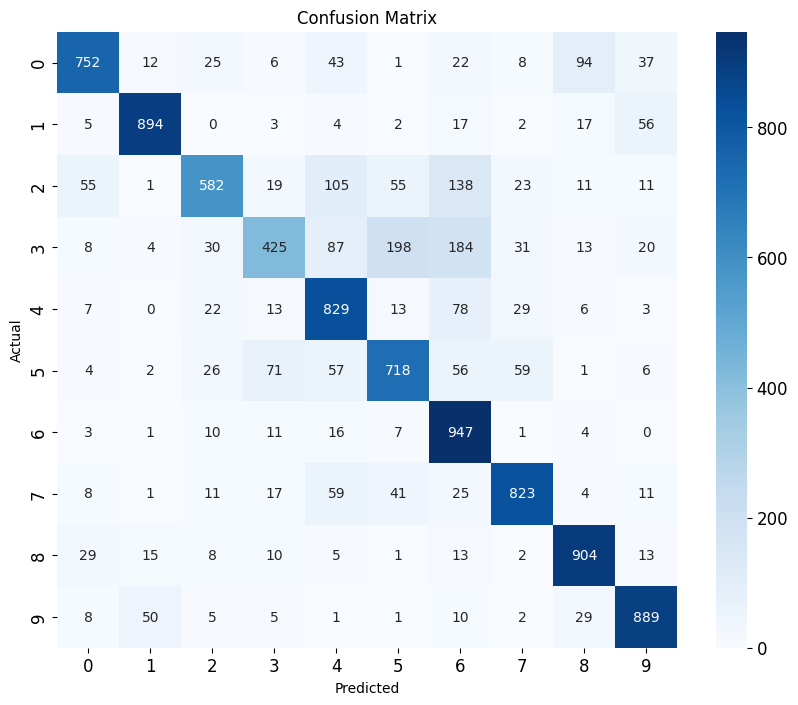

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Báo cáo chi tiết
print(classification_report(y_test, predicted_classes))

# Ma trận nhầm lẫn
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
model_3.save('model_3_final.keras')

In [ ]:
from tensorflow.keras.models import load_model

# Tải mô hình đã lưu
loaded_model = load_model('model_3.keras')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Bước 1: Load ảnh tùy chỉnh
img_path = 'OIP.jpg'  # Thay bằng đường dẫn đến ảnh của bạn
img = image.load_img(img_path, target_size=(32, 32))  # Resize ảnh về 32x32 pixel

# Bước 2: Chuyển ảnh thành mảng numpy
img_array = image.img_to_array(img)  # Chuyển ảnh thành mảng
img_array = img_array / 255.0  # Chuẩn hóa giá trị pixel về [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # Thêm batch dimension

# Bước 3: Dự đoán nhãn của ảnh
# Use loaded_model instead of load_model to call predict
predictions = loaded_model.predict(img_array)  # Dự đoán
predicted_class = np.argmax(predictions, axis=-1)  # Lấy lớp dự đoán có xác suất cao nhất

# Bước 4: Hiển thị kết quả
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Predicted class: {class_labels[predicted_class[0]]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted class: horse
